<a href="https://colab.research.google.com/github/Eliane-M/ml_database_design/blob/main/student_score_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

df = pd.read_csv('/content/Students_Grading_Dataset.csv')
df.head()

,Student_ID,First_Name,Last_Name,Email,Gender,Age,Department,Attendance (%),Midterm_Score,Final_Score,...,Projects_Score,Total_Score,Grade,Study_Hours_per_Week,Extracurricular_Activities,Internet_Access_at_Home,Parent_Education_Level,Family_Income_Level,Stress_Level (1-10),Sleep_Hours_per_Night
0,S1000,Omar,Williams,student0@university.com,Female,22,Engineering,52.29,55.03,57.82,...,85.90,56.09,F,6.2,No,Yes,High School,Medium,5,4.7
1,S1001,Maria,Brown,student1@university.com,Male,18,Engineering,97.27,97.23,45.80,...,55.65,50.64,A,19.0,No,Yes,NaN,Medium,4,9.0
2,S1002,Ahmed,Jones,student2@university.com,Male,24,Business,57.19,67.05,93.68,...,73.79,70.30,D,20.7,No,Yes,Master's,Low,6,6.2
3,S1003,Omar,Williams,student3@university.com,Female,24,Mathematics,95.15,47.79,80.63,...,92.12,61.63,A,24.8,Yes,Yes,High School,High,3,6.7
4,S1004,John,Smith,student4@university.com,Female,23,CS,54.18,46.59,78.89,...,68.42,66.13,F,15.4,Yes,Yes,High School,High,2,7.1


In [ ]:
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Initialize encoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Check if columns exist before dropping
columns_to_drop = ['Student_ID', 'Email', 'First_Name', 'Last_Name', 'Parent_Education_Level']
existing_columns = df.columns

columns_to_drop = [col for col in columns_to_drop if col in existing_columns]

# Drop only existing columns
df = df.drop(columns=columns_to_drop)
# Select categorical columns excluding 'Email' and 'Student ID'
categorical_cols = df.select_dtypes(include=['object']).columns
# Encode categorical data
encoded_data = encoder.fit_transform(df[categorical_cols])

# Create DataFrame with feature names
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_cols))

# Ensure index alignment
encoded_df.index = df.index

# Select numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Concatenate numeric and encoded data
df = pd.concat([numeric_df, encoded_df], axis=1)
df.dropna(inplace=True)
# Display first few rows
df.head()

,Age,Attendance (%),Midterm_Score,Final_Score,Assignments_Avg,Quizzes_Avg,Participation_Score,Projects_Score,Total_Score,Study_Hours_per_Week,...,Grade_C,Grade_D,Grade_F,Extracurricular_Activities_No,Extracurricular_Activities_Yes,Internet_Access_at_Home_No,Internet_Access_at_Home_Yes,Family_Income_Level_High,Family_Income_Level_Low,Family_Income_Level_Medium
0,22,52.29,55.03,57.82,84.22,74.06,3.99,85.90,56.09,6.2,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0
2,24,57.19,67.05,93.68,67.70,85.70,5.05,73.79,70.30,20.7,...,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,24,95.15,47.79,80.63,66.06,93.51,6.54,92.12,61.63,24.8,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
4,23,54.18,46.59,78.89,96.85,83.70,5.97,68.42,66.13,15.4,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
6,24,57.60,66.26,89.07,84.52,98.40,2.30,93.65,83.21,21.3,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0


In [ ]:
df.dropna(inplace=True)


In [ ]:
display(df[['Final_Score', 'Total_Score']])
df.info()

,Final_Score,Total_Score
0,57.82,56.09
2,93.68,70.30
3,80.63,61.63
4,78.89,66.13
6,89.07,83.21
...,...,...
4990,43.70,81.18
4993,59.18,85.86
4997,64.21,54.25
4998,94.28,55.84


<class 'pandas.core.frame.DataFrame'>
Index: 4018 entries, 0 to 4999
Data columns (total 30 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             4018 non-null   int64  
 1   Attendance (%)                  4018 non-null   float64
 2   Midterm_Score                   4018 non-null   float64
 3   Final_Score                     4018 non-null   float64
 4   Assignments_Avg                 4018 non-null   float64
 5   Quizzes_Avg                     4018 non-null   float64
 6   Participation_Score             4018 non-null   float64
 7   Projects_Score                  4018 non-null   float64
 8   Total_Score                     4018 non-null   float64
 9   Study_Hours_per_Week            4018 non-null   float64
 10  Stress_Level (1-10)             4018 non-null   int64  
 11  Sleep_Hours_per_Night           4018 non-null   float64
 12  Gender_Female                   4018 no

Age                               0.009607
Attendance (%)                   -0.015166
Midterm_Score                    -0.002401
Final_Score                       0.009915
Assignments_Avg                  -0.001364
Quizzes_Avg                       0.014089
Participation_Score              -0.024395
Projects_Score                   -0.017282
Total_Score                       1.000000
Study_Hours_per_Week             -0.020701
Stress_Level (1-10)               0.005359
Sleep_Hours_per_Night            -0.004910
Gender_Female                    -0.000913
Gender_Male                       0.000913
Department_Business              -0.024154
Department_CS                     0.020153
Department_Engineering           -0.004961
Department_Mathematics            0.006808
Grade_A                          -0.023966
Grade_B                          -0.012621
Grade_C                           0.033641
Grade_D                           0.017966
Grade_F                          -0.008241
Extracurric

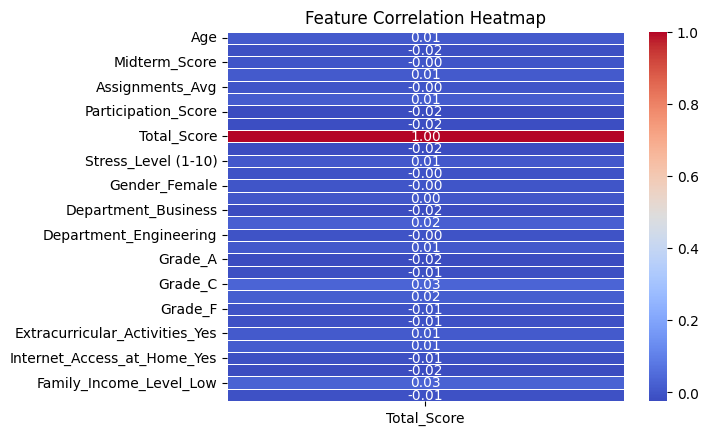

In [ ]:
numeric_df = df.select_dtypes(include=['number'])  # Include 'Stress_Level (1-10)'
correlations = numeric_df.corr(method='spearman')['Total_Score']
sns.heatmap(correlations.to_frame(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)  # Convert to DataFrame for heatmap
plt.title("Feature Correlation Heatmap")
print(correlations)

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled, columns=df.columns)

In [ ]:
from sklearn.model_selection import train_test_split
x = df.drop(columns=['Total_Score'])
y = df['Total_Score']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l1, l2, l1_l2

# Define the model
model = Sequential([
    Dense(128, activation='relu', kernel_regularizer=l2(0.01), input_shape=(x_train.shape[1],)),
    Dense(64, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(32, activation='relu', kernel_regularizer=l2(0.01)),
    Dense(1, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Display model summary
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                      │ (None, 128)                 │           3,840 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,209 (55.50 KB)

 Trainable params: 14,209 (55.50 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(x_train, y_train, epochs=100, batch_size=32, validation_data=(x_test, y_test))


Epoch 1/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 1655.4949 - mae: 30.5425 - val_loss: 247.8720 - val_mae: 13.1623
Epoch 2/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 252.9202 - mae: 13.3907 - val_loss: 241.3537 - val_mae: 13.0600
Epoch 3/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 241.1907 - mae: 13.0890 - val_loss: 238.7965 - val_mae: 13.0001
Epoch 4/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 254.1932 - mae: 13.4788 - val_loss: 239.6815 - val_mae: 12.9981
Epoch 5/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 241.4417 - mae: 13.1169 - val_loss: 237.8947 - val_mae: 12.9880
Epoch 6/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 238.7292 - mae: 13.1420 - val_loss: 232.0439 - val_mae: 12.8482
Epoch 7/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 241.8667 - mae: 13.2791 - val_loss: 231.9902 - val_mae: 12.8480
Epoch 8/100
101/101 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 236.9218 - mae: 13.0800 - val_loss: 241.4538 - val_mae: 13.0630

In [ ]:
loss, mae = model.evaluate(x_test, y_test)
print(f"Mean Absolute Error (MAE): {mae}")


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 225.4834 - mae: 12.6373
Mean Absolute Error (MAE): 12.707491874694824


26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step


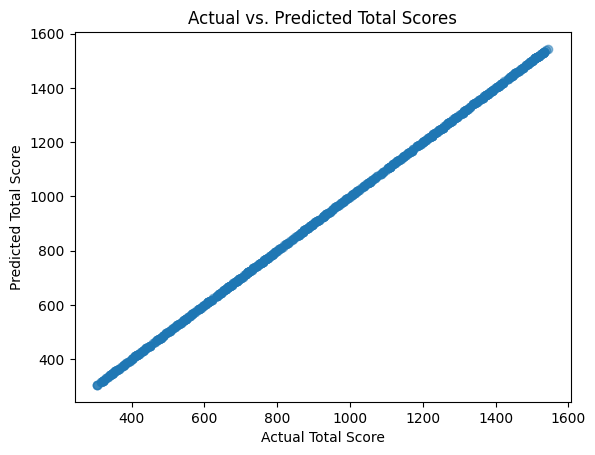

In [ ]:
y_pred = model.predict(x_test)

# Reshape y_test to have a single column
y_test_reshaped = y_test.values.reshape(-1, 1)

# Create a DataFrame with the same columns as the original data but only with the target variable (Total_Score)
y_pred_df = pd.DataFrame(y_pred, columns=['Total_Score'], index=x_test.index)
y_test_df = pd.DataFrame(y_test_reshaped, columns=['Total_Score'], index=x_test.index)

# Create a new DataFrame with the same columns as the original data, populated with the test data
# and update the Total_Score column with the predictions
x_test_with_pred = x_test.copy()
x_test_with_pred['Total_Score'] = y_pred_df['Total_Score']

# Create a new DataFrame with the same columns as the original data, populated with the test data
# and update the Total_Score column with the actual Total_Score values
x_test_with_actual = x_test.copy()
x_test_with_actual['Total_Score'] = y_test_df['Total_Score']

# Inverse transform using the dataframes with the same number of columns as the original data
y_pred_inverse = scaler.inverse_transform(x_test_with_pred)
y_test_inverse = scaler.inverse_transform(x_test_with_actual)

# Extract the Total_Score column from the inverse transformed dataframes
y_pred_inverse = y_pred_inverse[:, df.columns.get_loc('Total_Score')]
y_test_inverse = y_test_inverse[:, df.columns.get_loc('Total_Score')]

# Compare predictions with actual values
import matplotlib.pyplot as plt

plt.scatter(y_test_inverse, y_pred_inverse, alpha=0.5)
plt.xlabel("Actual Total Score")
plt.ylabel("Predicted Total Score")
plt.title("Actual vs. Predicted Total Scores")
plt.show()

In [ ]:
model.save('student_score_model.h5')